In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("train.csv")

C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_22756\1307078408.py:1: DtypeWarning: Columns (494,597,599,600,601,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("train.csv")


In [3]:
data.head()

ID  Year  Month  Hospital  Sample  ICU  OPD  Sex  Age  Ethnicity  ...  \
0   1  2018     11         7       1    2    2    2   53          1  ...   
1   2  2018      1         7       1    2    2    1   17          1  ...   
2   3  2018      5         7       1    2    2    1   47          1  ...   
3   4  2018      1         7       1    2    2    1   21          1  ...   
4   5  2016      8         7       1    2    1    1   99          1  ...   

   FU_L.interrogansserovarMankarsostr.Mankarso  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.santarosaiserovarGeorgiastr.LT117  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   FU_L.santarosaiserovarPyrogenesstr.Salinem  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   FU_L.interrogansserovarBataviaestr.VanTienan  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   FU_L.interrogansserovarAlexistr.616  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   FU_L.interrogansserovarAustralisstr.Ballico  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.interrogansserovarwolfiistr.3705  FU_L.interrogansserovarWeerasinghe  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

   FU_Patoc  Final  
0       NaN      2  
1       NaN      1  
2       NaN      2  
3       NaN      2  
4       NaN      2  

[5 rows x 806 columns]

In [4]:
data.shape

(1387, 806)

## preprocessing

In [5]:
data = data.drop('ID', axis=1)

In [6]:
data.replace(['99', 99], np.nan, inplace=True)

In [7]:
data.isna().mean()*100

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.984138
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 805, dtype: float64

## EDA

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

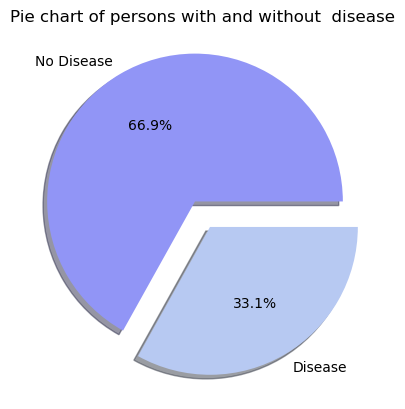

In [9]:
#pie chart of response variable
plt.pie(data['Final'].value_counts(), labels=['No Disease', 'Disease'], colors=['#9195F6', '#B7C9F2'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True);
plt.title("Pie chart of persons with and without  disease");

1	Confirmed
2	Not detected
## There is a class inbalance in this data set we need to address that issue

In [10]:
data['Final'].value_counts()

Final
2    928
1    459
Name: count, dtype: int64

In [11]:
# Separate categorical and continuous variables
categorical_vars = []
continuous_vars = []

for column in data.columns:
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)




In [12]:
print("Categorical Variables:", categorical_vars)

Categorical Variables: ['Year', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Ethnicity', 'TertiaryEducation', 'Prophylactics', 'Pasttreatments', 'Pastantibiotics', 'Chronicillness', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'Sourceofwaterforhousehold', 'Garbagedisposalprocedure', 'Accumilationofrefusal', 'Availabilityofpublicgarbagecollectionprocedure', 'HomeStreamrivercanaloranyotherrunningwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'Homepondlaketankoranyotherstagnantwatersource', 'WorkPlacepondlaketankoranyotherstagnantwatersource', 'Homemarshywetland', 'Workplacemarshywet', 'HomeBushes', 'Workplacebushes', 'Homeforest', 'Workplaceforest', 'Homeworkingpaddyfield', 'WorkPlaceworkingpaddyfield', 'Homeabondantpaddyfield', 'Workplaceabondantpaddyfield', 'Homeotheragricultural', 'workplaceotheragricultural', 'Homeanimalfarm', 'Workplaceanimalfarm', 'Homegarbageaccumilation', 'Workplacegarbageaccumilation', 'Homeblockeddrainage', '

In [13]:
print("Continuous Variables:", continuous_vars)

Continuous Variables: ['Month', 'Age', 'Income', 'Education', 'MarshlandexposureDuration', 'wetsoilduration', 'forestduration', 'BushesDuration', 'Naturalrunningduration', 'Paddyfieldduration', 'PRad', 'SBPadd', 'DBPadd', 'Pulserate2', 'Pulserate3', 'Pulserate4', 'Pulserate5', 'Pulserate6', 'Pulserate7', 'Pulserate8', 'Pulserate9', 'Pulserate10', 'SBP2', 'DBP2', 'SBP3', 'DBP3', 'SBP4', 'DBP4', 'SBP5', 'DBP5', 'SBP6', 'DBP6', 'SBP7', 'DBP7', 'SBP8', 'DBP8', 'SBP9', 'DBP9', 'SBP10', 'WBCcount', 'Ncount', 'N', 'Lcount', 'L', 'Plateletcount', 'PCV', 'RBC', 'CRP', 'ESR', 'Na', 'K', 'AST', 'ALT', 'T.Bilirubin', 'D.Bilirubin', 'X.GT', 'S.creatinine', 'B.urea', 'Samylase', 'ALP', 'PulseRate', 'WBC_first_day', 'WBCCount1', 'WBCcount2', 'WBCcount3', 'WBCcount4', 'WBCcount5', 'WBCcount6', 'WBCcount7', 'WBCcount8', 'WBCcount9', 'WBCcount10', 'Ncount2', 'Ncount3', 'Ncount4', 'Ncount5', 'Ncount6', 'Ncount7', 'Ncount8', 'Ncount9', 'Ncount10', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'Lc

In [14]:
# Initialize counters
categorical_vars = []
continuous_vars = []

# Loop through each column to classify
for column in data.columns:
    # Get the number of unique values
    unique_values = data[column].nunique()
    
    # Classify based on data type and number of unique values
    if data[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 805
Categorical Variables: 562
Continuous Variables: 243


## Univariate analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Filter out continuous variables present in data
present_continuous_vars = [var for var in continuous_vars if var in data.columns]

# Define the number of columns in the subplot grid
num_cols = 2

# Calculate the number of rows needed for the subplot grid
num_rows = (len(present_continuous_vars) + num_cols - 1) // num_cols

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Iterate over continuous variables and create histograms and boxplots
for i, var in enumerate(present_continuous_vars):
    # Histogram
    sns.histplot(data[var], ax=axes[i*num_cols], kde=True)
    axes[i*num_cols].set_title(f'Histogram of {var}')
    axes[i*num_cols].set_xlabel(var)
    axes[i*num_cols].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(data[var], ax=axes[i*num_cols+1])
    axes[i*num_cols+1].set_title(f'Boxplot of {var}')
    axes[i*num_cols+1].set_xlabel(var)
    axes[i*num_cols+1].set_ylabel('')
    
# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 244 is out of bounds for axis 0 with size 244

In [16]:
## We can see that most of the distributions are skewed hence we need to scale the variables before applying dimension reduction techniques such as PCA  or model fitting

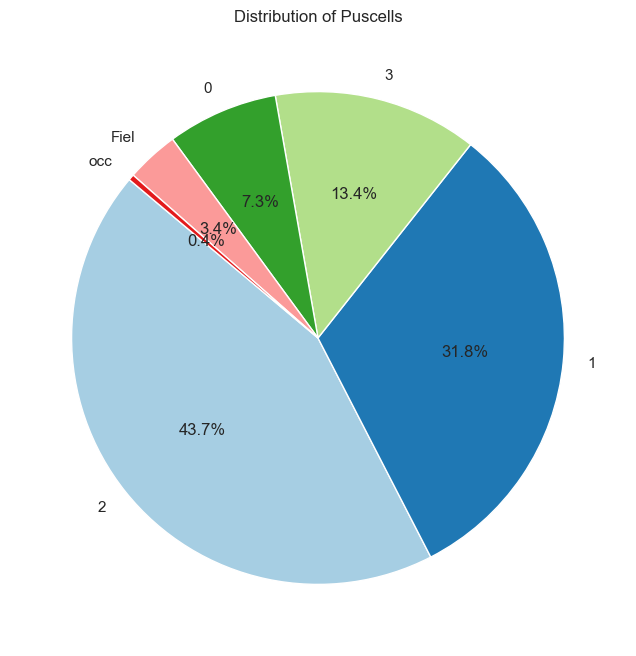

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and "Puscells" is the column of interest
# Handling potential whitespace around column name
column_name = "Puscells".strip()

# Drop missing values for simplicity, or handle as needed
puscells_data = data[column_name].dropna()

# Count the occurrences of each category
puscells_counts = puscells_data.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(puscells_counts, labels=puscells_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Puscells')
plt.show()


In [18]:
categorical_vars

['Year',
 'Hospital',
 'Sample',
 'ICU',
 'OPD',
 'Sex',
 'Ethnicity',
 'TertiaryEducation',
 'Prophylactics',
 'Pasttreatments',
 'Pastantibiotics',
 'Chronicillness',
 'Possibleexposure',
 'Usualdrinkingwatersource',
 'Usualbathingwatersource',
 'Sourceofwaterforhousehold',
 'Garbagedisposalprocedure',
 'Accumilationofrefusal',
 'Availabilityofpublicgarbagecollectionprocedure',
 'HomeStreamrivercanaloranyotherrunningwatersource',
 'WorkplaceStreamrivercanaloranyotherrunningwatersource',
 'Homepondlaketankoranyotherstagnantwatersource',
 'WorkPlacepondlaketankoranyotherstagnantwatersource',
 'Homemarshywetland',
 'Workplacemarshywet',
 'HomeBushes',
 'Workplacebushes',
 'Homeforest',
 'Workplaceforest',
 'Homeworkingpaddyfield',
 'WorkPlaceworkingpaddyfield',
 'Homeabondantpaddyfield',
 'Workplaceabondantpaddyfield',
 'Homeotheragricultural',
 'workplaceotheragricultural',
 'Homeanimalfarm',
 'Workplaceanimalfarm',
 'Homegarbageaccumilation',
 'Workplacegarbageaccumilation',
 'Homeblo

## Bivariate Distribution

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(8, 5))

# Plot density plot for class 2
sns.kdeplot(class_2_data['Age'], color='blue', shade=True, label='No dicease')

# Plot density plot for class 1
sns.kdeplot(class_1_data['Age'], color='green', shade=True, label='dicease')

# Set labels and title
plt.title('Age Distribution for Class 1 and Class 2')
plt.xlabel('Age')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()


NameError: name 'class_2_data' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Approximately moew old people are suffering from dicease byt there is a bpeak for Disease patients arount Age is 40

In [323]:
continuous_vars

['Month',
 'Age',
 'Income',
 'Education',
 'MarshlandexposureDuration',
 'wetsoilduration',
 'forestduration',
 'BushesDuration',
 'Naturalrunningduration',
 'Paddyfieldduration',
 'PRad',
 'SBPadd',
 'DBPadd',
 'Pulserate2',
 'Pulserate3',
 'Pulserate4',
 'Pulserate5',
 'Pulserate6',
 'Pulserate7',
 'Pulserate8',
 'Pulserate9',
 'Pulserate10',
 'SBP2',
 'DBP2',
 'SBP3',
 'DBP3',
 'SBP4',
 'DBP4',
 'SBP5',
 'DBP5',
 'SBP6',
 'DBP6',
 'SBP7',
 'DBP7',
 'SBP8',
 'DBP8',
 'SBP9',
 'DBP9',
 'SBP10',
 'WBCcount',
 'Ncount',
 'N',
 'Lcount',
 'L',
 'Plateletcount',
 'PCV',
 'RBC',
 'CRP',
 'ESR',
 'Na',
 'K',
 'AST',
 'ALT',
 'T.Bilirubin',
 'D.Bilirubin',
 'X.GT',
 'S.creatinine',
 'B.urea',
 'Samylase',
 'ALP',
 'PulseRate',
 'WBC_first_day',
 'WBCCount1',
 'WBCcount2',
 'WBCcount3',
 'WBCcount4',
 'WBCcount5',
 'WBCcount6',
 'WBCcount7',
 'WBCcount8',
 'WBCcount9',
 'WBCcount10',
 'Ncount2',
 'Ncount3',
 'Ncount4',
 'Ncount5',
 'Ncount6',
 'Ncount7',
 'Ncount8',
 'Ncount9',
 'Ncount10',


C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\152953804.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_2_data['Income'], color='blue', shade=True, label='No dicease')
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\152953804.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_1_data['Income'], color='green', shade=True, label='dicease')
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

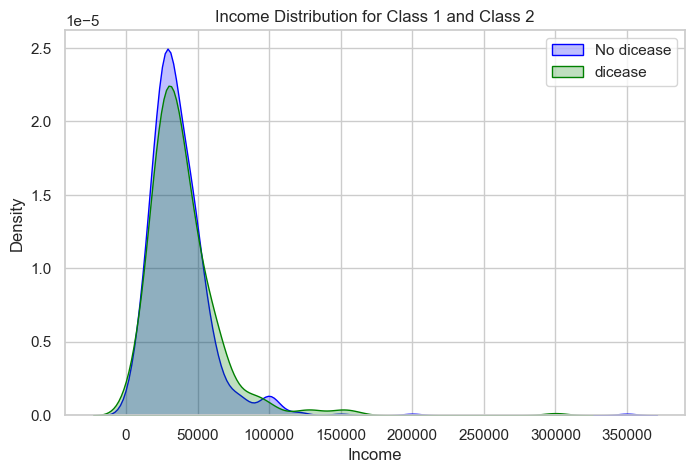

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(8, 5))

# Plot density plot for class 2
sns.kdeplot(class_2_data['Income'], color='blue', shade=True, label='No dicease')

# Plot density plot for class 1
sns.kdeplot(class_1_data['Income'], color='green', shade=True, label='dicease')

# Set labels and title
plt.title('Income Distribution for Class 1 and Class 2')
plt.xlabel('Income')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# generally Both classes hase same income bur No dicease group has slight higher income

C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\2964291858.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_2_data['WBCcount'], color='blue', shade=True, label='No dicease')
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\2964291858.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_1_data['WBCcount'], color='green', shade=True, label='dicease')
C:\Users\HIRUNI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

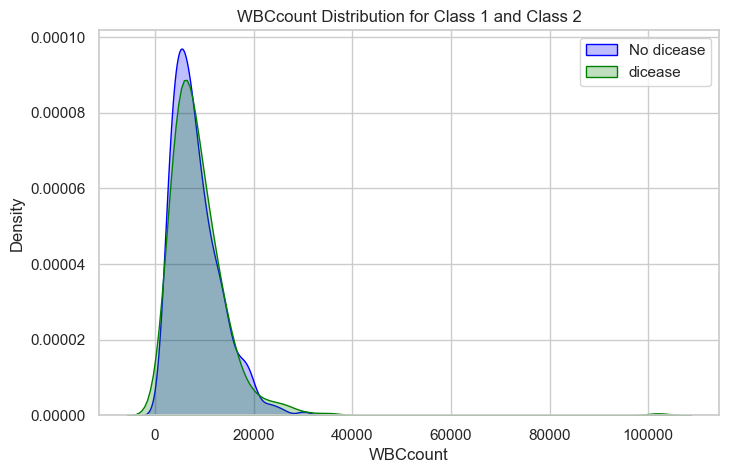

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(8, 5))

# Plot density plot for class 2
sns.kdeplot(class_2_data['WBCcount'], color='blue', shade=True, label='No dicease')

# Plot density plot for class 1
sns.kdeplot(class_1_data['WBCcount'], color='green', shade=True, label='dicease')

# Set labels and title
plt.title('WBCcount Distribution for Class 1 and Class 2')
plt.xlabel('WBCcount')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()


AttributeError: 'numpy.float64' object has no attribute 'startswith'

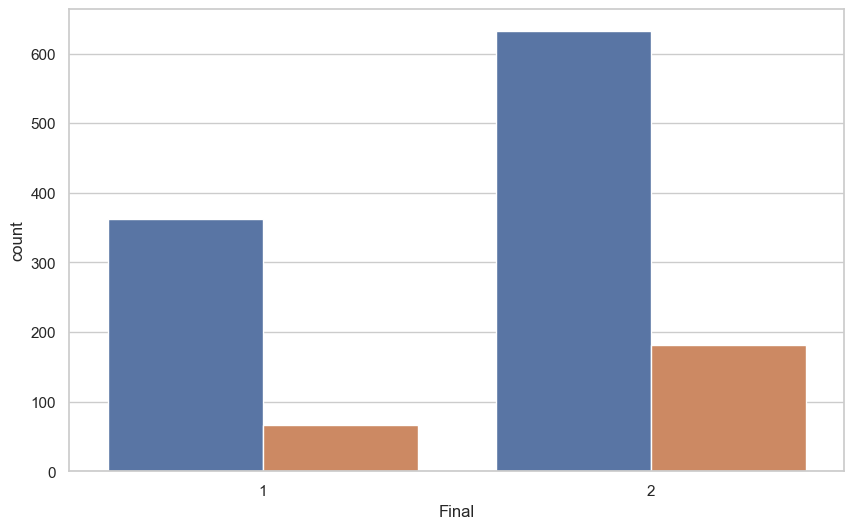

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot bar graph
sns.countplot(data=data, x='Final', hue='Sex')

# Set labels and title
plt.title('Bar Graph of Final by Gender')
plt.xlabel('Final')
plt.ylabel('Count')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot bar graph
sns.countplot(data=data, x='Final', hue='Sex')

# Set labels and title
plt.title('Bar Graph of Final by Gender')
plt.xlabel('Final')
plt.ylabel('Count')

# Show legend
plt.legend(title='Sex')
plt.legend(title='DI')
# Show plot
plt.show()


In [280]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


In [281]:
# List to store results
results = []

In [282]:

# Iterate through each categorical variable and calculate association
for column in categorical_vars:
    if column != 'Final':
        confusion_matrix = pd.crosstab(data['Final'], data[column])
        
        # Check if the confusion matrix is valid
        if confusion_matrix.size == 0 or np.any(confusion_matrix.sum(axis=1) == 0) or np.any(confusion_matrix.sum(axis=0) == 0):
            print(f"Skipping variable '{column}' due to invalid contingency table.")
            continue
        
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        cramer_v_value = cramers_v(confusion_matrix)
        
        results.append({
            'Explanatory Variable': column,
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Cramér\'s V': cramer_v_value
        })

C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: Runtime

Skipping variable 'S.phosphate10' due to invalid contingency table.
Skipping variable 'Geyaweera' due to invalid contingency table.
Skipping variable 'PomonaF' due to invalid contingency table.


C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\3965304872.py:5: Runtime

In [319]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {len(categorical_vars)} -> {categorical_vars}')
print(f'Continuous Variables: {len(continuous_vars)} -> {continuous_vars}\n')
print(results_df)

Total Variables: 805
Categorical Variables: 562 -> ['Year', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Ethnicity', 'TertiaryEducation', 'Prophylactics', 'Pasttreatments', 'Pastantibiotics', 'Chronicillness', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'Sourceofwaterforhousehold', 'Garbagedisposalprocedure', 'Accumilationofrefusal', 'Availabilityofpublicgarbagecollectionprocedure', 'HomeStreamrivercanaloranyotherrunningwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'Homepondlaketankoranyotherstagnantwatersource', 'WorkPlacepondlaketankoranyotherstagnantwatersource', 'Homemarshywetland', 'Workplacemarshywet', 'HomeBushes', 'Workplacebushes', 'Homeforest', 'Workplaceforest', 'Homeworkingpaddyfield', 'WorkPlaceworkingpaddyfield', 'Homeabondantpaddyfield', 'Workplaceabondantpaddyfield', 'Homeotheragricultural', 'workplaceotheragricultural', 'Homeanimalfarm', 'Workplaceanimalfarm', 'Homegarbageaccumilation', 'Workplacegarbageaccumilatio

In [320]:
# Filter out significant variables at 5% level
significant_results = results_df[results_df['p-value'] < 0.05]

print("Significant Variables at 5% level:")
print(significant_results)


Significant Variables at 5% level:
                                  Explanatory Variable  Chi-Square Statistic  \
0                                                 Year             43.670071   
1                                             Hospital             38.023593   
4                                                  OPD              6.713740   
5                                                  Sex              8.021102   
10                                     Pastantibiotics              6.735609   
..                                                 ...                   ...   
534  Acu_L.interrogansserovarIcterohaemorrhagiaestr...              6.505084   
536            Acu_L.santarosaiserovarGeorgiastr.LT117              8.614137   
538      Acu_L.interrogansserovarBataviaestr.VanTienan             11.282594   
542                Acu_L.interrogansserovarWeerasinghe              8.428362   
544  FU_L.interrogansserovarBratislavastr.JezBratis...             14.055144   

    

In [321]:
# There are 119 significent variables at 5% significent  level

In [ ]:
## Most important top  significent variables

In [289]:
# Sort the results DataFrame by the 'p-value' column in ascending order
results_df_sorted = results_df.sort_values(by='p-value')

# Select the top 5 most significant variables
top_5_significant_variables = results_df_sorted.head(5)

# Print the top 5 significant variables
print("Top 5 Most Significant Variables:")
print(top_5_significant_variables)


Top 5 Most Significant Variables:
    Explanatory Variable  Chi-Square Statistic        p-value  Cramér's V
477      WPqPCRDiagnosis            571.203877  9.218368e-125    0.703242
478   UrineqPCRDiagnosis            110.743387   8.961464e-25    0.466445
479       CultureqPCRDia             78.774189   7.841553e-18    0.531361
482              Isolate             59.908507   9.795644e-14    0.207829
0                   Year             43.670071   1.773456e-09    0.177441


In [286]:
# Split variables into significant and non-significant groups
significant_variables = significant_results['Explanatory Variable'].tolist()
non_significant_variables = results_df[~results_df['Explanatory Variable'].isin(significant_variables)]['Explanatory Variable'].tolist()

print("Significant Variables:")
print(significant_variables)
print("\nNon-Significant Variables:")
print(non_significant_variables)


Significant Variables:
['Year', 'Hospital', 'OPD', 'Sex', 'Pastantibiotics', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'WorkPlaceworkingpaddyfield', 'Homeabondantpaddyfield', 'Workplaceabondantpaddyfield', 'Homeanimalfarm', 'PigNeighbourhood', 'Otheroutdoorworkfrequency', 'Naturalrunningwaterexposure', 'CattleHandle', 'Muscletendernessonset', 'Muscletendernessad', 'Cnsuffusionad', 'Jaundicead', 'Neckstiffnessad', 'Fever2', 'Fever3', 'Musclepain2', 'Mustender2', 'Mustender3', 'Mustender4', 'Mustender5', 'Mustender9', 'Mustender10', 'Nausea5', 'Consuf2', 'Consuf3', 'Consuf4', 'Consuf5', 'diarrhea7', 'diarrhea8', 'diarrhea10', 'Anuria3', 'hepatictender4', 'hepatictender10', 'Neckstiffness2', 'Neckstiffness3', 'Neckstiffness4', 'Neckstiffness5', 'Neckstiffness6', 'Neckstiffness7', 'Neckstiffness8', 'Neckstiffness10', 'Confusion8', 'WPqPCRDiagnosis', 'UrineqPCRDiagnosis', 'CultureqPCRDia', 'SerumqPCRDi

In [287]:
# Provided variables
provided_variables = [
    "Muscletendernessonset", "Muscletendernessad", "Vomitingadmission",
    "Cnsuffusionad", "Cnsuffusiononset", "Mucosalrashonset",
    "Mucosalrashad", "Diarrhoeaonset", "Diarrhoeaad", "OliguriaAd",
    "Haemoptasisonset", "Haemoptasisad", "SOBadd"
]

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(provided_variables)]

# Check significance for each variable
for variable in provided_variables:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Muscletendernessonset: Significant
Muscletendernessad: Significant
Vomitingadmission: Not Significant
Cnsuffusionad: Significant
Cnsuffusiononset: Not Significant
Mucosalrashonset: Not Significant
Mucosalrashad: Not Significant
Diarrhoeaonset: Not Significant
Diarrhoeaad: Not Significant
OliguriaAd: Not Significant
Haemoptasisonset: Not Significant
Haemoptasisad: Not Significant
SOBadd: Not Significant


In [288]:
# List of variable names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Headache: Not Significant
Fever: Not Significant
Chills: Not Significant
Rigors: Not Significant
Musclepain: Not Significant
Mustender: Not Significant
Nausea: Not Significant
Vomiting: Not Significant
Consuf: Not Significant
Skinrash: Not Significant
Mucorash: Not Significant
Prostration: Not Significant
diarrhea: Not Significant
Oliguria: Not Significant
Anuria: Not Significant
Jaundice: Not Significant
Photophobia: Not Significant
Confusion: Not Significant
Cough: Not Significant
Haemoptysis: Not Significant
SOB: Not Significant
Chestpain: Not Significant
Bleeding: Not Significant


## headache

In [177]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Headache"
headache_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Headache'):
        headache_columns.append(column_name)

# Print the column names starting with "Headache"
print("Columns starting with 'Headache':", headache_columns)


Columns starting with 'Headache': ['Headacheonset', 'Headachead', 'Headache2', 'Headache3', 'Headache4', 'Headache5', 'Headache6', 'Headache7', 'Headache8', 'Headache9', 'Headache10']


In [178]:
# List of variable names
colnames = headache_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")


Headacheonset: p-value = 0.48803404187437016, Not Significant
Headachead: p-value = 0.40797728214491225, Not Significant
Headache2: p-value = 0.555570079429579, Not Significant
Headache3: p-value = 0.15570429462792784, Not Significant
Headache4: p-value = 0.5502277680413259, Not Significant
Headache5: p-value = 0.9966535636204348, Not Significant
Headache6: p-value = 0.05197337693344783, Not Significant
Headache7: p-value = 0.2589796485396606, Not Significant
Headache8: p-value = 0.33281177777875703, Not Significant
Headache9: p-value = 0.35114641784379486, Not Significant
Headache10: p-value = 0.09290807841892502, Not Significant


In [179]:
# List of variable names
colnames = headache_columns
# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Headacheonset: Not Significant
Headachead: Not Significant
Headache2: Not Significant
Headache3: Not Significant
Headache4: Not Significant
Headache5: Not Significant
Headache6: Not Significant
Headache7: Not Significant
Headache8: Not Significant
Headache9: Not Significant
Headache10: Not Significant


In [180]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from head ache

## fever

In [181]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Fever"
fever_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Fever'):
        fever_columns.append(column_name)

# Print the column names starting with "Fever"
print("Columns starting with 'Fever':", fever_columns)

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Fever': ['Feveronset', 'Feverad', 'Fever2', 'Fever3', 'Fever4', 'Fever5', 'Fever6', 'Fever7', 'Fever8', 'Fever9', 'Fever10']
Feveronset: p-value = 0.44304114308857245, Not Significant
Feverad: p-value = 0.9486920213542729, Not Significant
Fever2: p-value = 0.0014893411579217646, Significant
Fever3: p-value = 0.020296102130126864, Significant
Fever4: p-value = 0.21264786855670734, Not Significant
Fever5: p-value = 0.7016925928979084, Not Significant
Fever6: p-value = 0.05802440722727963, Not Significant
Fever7: p-value = 0.25769982732957264, Not Significant
Fever8: p-value = 0.07187703909627219, Not Significant
Fever9: p-value = 1.0, Not Significant
Fever10: p-value = 0.43709479069245305, Not Significant
Feveronset: Not Significant
Feverad: Not Significant
Fever2: Significant
Fever3: Significant
Fever4: Not Significant
Fever5: Not Significant
Fever6: Not Significant
Fever7: Not Significant
Fever8: Not Significant
Fever9: Not Significant
Fever10: Not Significant


In [182]:
### Most of These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from fever

## chills

In [183]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Chills"
chills_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chills'):
        chills_columns.append(column_name)

# Print the column names starting with "Chills"
print("Columns starting with 'Chills':", chills_columns)

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Chills': ['Chillsonset', 'Chillsad', 'Chills2', 'Chills3', 'Chills4', 'Chills5', 'Chills6', 'Chills7', 'Chills8', 'Chills9', 'Chills10']
Chillsonset: p-value = 0.6378134956836837, Not Significant
Chillsad: p-value = 0.8718367618014667, Not Significant
Chills2: p-value = 0.7715091027210121, Not Significant
Chills3: p-value = 0.4162262998403865, Not Significant
Chills4: p-value = 0.6478061429360751, Not Significant
Chills5: p-value = 0.46523243482079113, Not Significant
Chills6: p-value = 0.15224591731989828, Not Significant
Chills7: p-value = 0.5570761249948751, Not Significant
Chills8: p-value = 0.9370154592746748, Not Significant
Chills9: p-value = 0.23107912375459355, Not Significant
Chills10: p-value = 0.32406473329882945, Not Significant
Chillsonset: Not Significant
Chillsad: Not Significant
Chills2: Not Significant
Chills3: Not Significant
Chills4: Not Significant
Chills5: Not Significant
Chills6: Not Significant
Chills7: Not Significant
Chills8: Not Signifi

In [184]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from chills

## Rigors

In [185]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Rigors"
rigors_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Rigors'):
        rigors_columns.append(column_name)

# Print the column names starting with "Rigors"
print("Columns starting with 'Rigors':", rigors_columns)

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Rigors': ['Rigorsonset', 'Rigorsad', 'Rigors2', 'Rigors3', 'Rigors4', 'Rigors5', 'Rigors6', 'Rigors7', 'Rigors8', 'Rigors9', 'Rigors10']
Rigorsonset: p-value = 0.4029891667125889, Not Significant
Rigorsad: p-value = 0.3513055554891604, Not Significant
Rigors2: p-value = 0.35196301930994, Not Significant
Rigors3: p-value = 0.49363177239585354, Not Significant
Rigors4: p-value = 1.0, Not Significant
Rigors5: p-value = 0.9885846046993148, Not Significant
Rigors6: p-value = 0.6218220812672447, Not Significant
Rigors7: p-value = 0.790844778312326, Not Significant
Rigors8: p-value = 0.4167442806713523, Not Significant
Rigors9: p-value = 0.6439010293945844, Not Significant
Rigors10: p-value = 0.21625891072834694, Not Significant
Rigorsonset: Not Significant
Rigorsad: Not Significant
Rigors2: Not Significant
Rigors3: Not Significant
Rigors4: Not Significant
Rigors5: Not Significant
Rigors6: Not Significant
Rigors7: Not Significant
Rigors8: Not Significant
Rigors9: Not Si

In [186]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Musclepain

In [187]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Musclepain"
musclepain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Musclepain'):
        musclepain_columns.append(column_name)

# Print the column names starting with "Musclepain"
print("Columns starting with 'Musclepain':", musclepain_columns)

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Musclepain': ['Musclepainonset', 'Musclepainad', 'Musclepain2', 'Musclepain3', 'Musclepain4', 'Musclepain5', 'Musclepain6', 'Musclepain7', 'Musclepain8', 'Musclepain9', 'Musclepain10']
Musclepainonset: p-value = 0.1761753843288504, Not Significant
Musclepainad: p-value = 0.19238090164614088, Not Significant
Musclepain2: p-value = 0.04932900505710121, Significant
Musclepain3: p-value = 0.131821247441185, Not Significant
Musclepain4: p-value = 0.36353111250655223, Not Significant
Musclepain5: p-value = 0.3703725569252184, Not Significant
Musclepain6: p-value = 0.6704797101550891, Not Significant
Musclepain7: p-value = 0.32795624464569706, Not Significant
Musclepain8: p-value = 0.5352685444973886, Not Significant
Musclepain9: p-value = 0.24471853781346417, Not Significant
Musclepain10: p-value = 0.07084925772611635, Not Significant
Musclepainonset: Not Significant
Musclepainad: Not Significant
Musclepain2: Significant
Musclepain3: Not Significant
Musclepain4: Not Si

In [188]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Mustender

In [189]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Mustender"
mustender_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Mustender'):
        mustender_columns.append(column_name)

# Print the column names starting with "Mustender"
print("Columns starting with 'Mustender':", mustender_columns)

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Mustender': ['Mustender2', 'Mustender3', 'Mustender4', 'Mustender5', 'Mustender6', 'Mustender7', 'Mustender8', 'Mustender9', 'Mustender10']
Mustender2: p-value = 0.011705855803382981, Significant
Mustender3: p-value = 0.035394278817417184, Significant
Mustender4: p-value = 0.032752353782806665, Significant
Mustender5: p-value = 0.027616688801009814, Significant
Mustender6: p-value = 0.38238878669425147, Not Significant
Mustender7: p-value = 0.5687957860718817, Not Significant
Mustender8: p-value = 0.5484646543307173, Not Significant
Mustender9: p-value = 0.04133107497908407, Significant
Mustender10: p-value = 0.018017672180939644, Significant
Mustender2: Significant
Mustender3: Significant
Mustender4: Significant
Mustender5: Significant
Mustender6: Not Significant
Mustender7: Not Significant
Mustender8: Not Significant
Mustender9: Significant
Mustender10: Significant


In [190]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Nausea

In [191]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Nausea"
nausea_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Nausea'):
        nausea_columns.append(column_name)

# Print the column names starting with "Nausea"
print("Columns starting with 'Nausea':", nausea_columns)

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Nausea': ['Nauseaonset', 'Nauseaad', 'Nausea2', 'Nausea3', 'Nausea4', 'Nausea5', 'Nausea6', 'Nausea7', 'Nausea8', 'Nausea9', 'Nausea10']
Nauseaonset: p-value = 0.6783900390870716, Not Significant
Nauseaad: p-value = 0.8223053525842329, Not Significant
Nausea2: p-value = 0.6055495174992924, Not Significant
Nausea3: p-value = 0.8783880907665671, Not Significant
Nausea4: p-value = 0.33313368557445777, Not Significant
Nausea5: p-value = 0.005896949274864958, Significant
Nausea6: p-value = 0.09220783627936133, Not Significant
Nausea7: p-value = 0.3849591805821724, Not Significant
Nausea8: p-value = 0.11840971443507198, Not Significant
Nausea9: p-value = 0.3617872882005516, Not Significant
Nausea10: p-value = 0.8042976433524492, Not Significant
Nauseaonset: Not Significant
Nauseaad: Not Significant
Nausea2: Not Significant
Nausea3: Not Significant
Nausea4: Not Significant
Nausea5: Significant
Nausea6: Not Significant
Nausea7: Not Significant
Nausea8: Not Significant
Na

In [192]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Vomiting

In [193]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Vomiting"
vomiting_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Vomiting'):
        vomiting_columns.append(column_name)

# Print the column names starting with "Vomiting"
print("Columns starting with 'Vomiting':", vomiting_columns)

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Vomiting': ['Vomitingonset', 'Vomitingadmission', 'Vomiting2', 'Vomiting3', 'Vomiting4', 'Vomiting5', 'Vomiting6', 'Vomiting7', 'Vomiting8', 'Vomiting9', 'Vomiting10']
Vomitingonset: p-value = 0.7696791766753228, Not Significant
Vomitingadmission: p-value = 0.4031548709580506, Not Significant
Vomiting2: p-value = 0.7227848897547728, Not Significant
Vomiting3: p-value = 0.4337974117793404, Not Significant
Vomiting4: p-value = 0.37784958805770286, Not Significant
Vomiting5: p-value = 0.07787876503947612, Not Significant
Vomiting6: p-value = 0.1848918881416526, Not Significant
Vomiting7: p-value = 0.15756723449001353, Not Significant
Vomiting8: p-value = 0.0977379744891529, Not Significant
Vomiting9: p-value = 0.36978697467054766, Not Significant
Vomiting10: p-value = 0.766721968822215, Not Significant
Vomitingonset: Not Significant
Vomitingadmission: Not Significant
Vomiting2: Not Significant
Vomiting3: Not Significant
Vomiting4: Not Significant
Vomiting5: Not Sign

In [194]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Photophobia

In [195]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Photophobia"
photophobia_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Photophobia'):
        photophobia_columns.append(column_name)

# Print the column names starting with "Photophobia"
print("Columns starting with 'Photophobia':", photophobia_columns)

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Photophobia': ['Photophobiaonset', 'Photophobiaad', 'Photophobia2', 'Photophobia3', 'Photophobia4', 'Photophobia5', 'Photophobia6', 'Photophobia7', 'Photophobia8', 'Photophobia9', 'Photophobia10']
Photophobiaonset: p-value = 0.766186592569455, Not Significant
Photophobiaad: p-value = 1.0, Not Significant
Photophobia2: p-value = 0.3674239822162738, Not Significant
Photophobia3: p-value = 0.5653070712761202, Not Significant
Photophobia4: p-value = 0.7541855175536473, Not Significant
Photophobia5: p-value = 0.7637166093973474, Not Significant
Photophobia6: p-value = 0.4942731764314624, Not Significant
Photophobia7: p-value = 0.3355063075427722, Not Significant
Photophobia8: p-value = 0.6686920783918966, Not Significant
Photophobia9: p-value = 0.5322495765921287, Not Significant
Photophobia10: p-value = 0.2578729674585505, Not Significant
Photophobiaonset: Not Significant
Photophobiaad: Not Significant
Photophobia2: Not Significant
Photophobia3: Not Significant
Photo

In [196]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Confusion

In [197]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Confusion"
confusion_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Confusion'):
        confusion_columns.append(column_name)

# Print the column names starting with "Confusion"
print("Columns starting with 'Confusion':", confusion_columns)

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Confusion': ['Confusiononset', 'Confusionad', 'Confusion2', 'Confusion3', 'Confusion4', 'Confusion5', 'Confusion6', 'Confusion7', 'Confusion8', 'Confusion9', 'Confusion10']
Confusiononset: p-value = 0.12543892978426072, Not Significant
Confusionad: p-value = 0.07392199776493541, Not Significant
Confusion2: p-value = 0.05401245920108666, Not Significant
Confusion3: p-value = 0.27306028525581955, Not Significant
Confusion4: p-value = 0.7476511510758574, Not Significant
Confusion5: p-value = 1.0, Not Significant
Confusion6: p-value = 0.26785867338083935, Not Significant
Confusion7: p-value = 0.42448732656035604, Not Significant
Confusion8: p-value = 0.012099545521039482, Significant
Confusion9: p-value = 0.055785609311906, Not Significant
Confusion10: p-value = 0.12882074995380902, Not Significant
Confusiononset: Not Significant
Confusionad: Not Significant
Confusion2: Not Significant
Confusion3: Not Significant
Confusion4: Not Significant
Confusion5: Not Significan

In [198]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Cough

In [199]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Cough"
cough_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Cough'):
        cough_columns.append(column_name)

# Print the column names starting with "Cough"
print("Columns starting with 'Cough':", cough_columns)

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Cough': ['Coughonset', 'Coughad', 'Cough2', 'Cough3', 'Cough4', 'Cough5', 'Cough6', 'Cough7', 'Cough8', 'Cough9', 'Cough10']
Coughonset: p-value = 0.17387705045882867, Not Significant
Coughad: p-value = 0.22364459016512253, Not Significant
Cough2: p-value = 0.28194231448967344, Not Significant
Cough3: p-value = 0.38887875812020833, Not Significant
Cough4: p-value = 0.7598919704442714, Not Significant
Cough5: p-value = 0.9332592937128255, Not Significant
Cough6: p-value = 0.9703807671057647, Not Significant
Cough7: p-value = 0.7887308291953214, Not Significant
Cough8: p-value = 0.4171317699208863, Not Significant
Cough9: p-value = 0.48286774842636226, Not Significant
Cough10: p-value = 0.5525769269097185, Not Significant
Coughonset: Not Significant
Coughad: Not Significant
Cough2: Not Significant
Cough3: Not Significant
Cough4: Not Significant
Cough5: Not Significant
Cough6: Not Significant
Cough7: Not Significant
Cough8: Not Significant
Cough9: Not Significant
Co

In [200]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Haemoptysis

In [201]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Haemoptysis"
haemoptysis_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Haemoptysis'):
        haemoptysis_columns.append(column_name)

# Print the column names starting with "Haemoptysis"
print("Columns starting with 'Haemoptysis':", haemoptysis_columns)

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Haemoptysis': ['Haemoptysis2', 'Haemoptysis3', 'Haemoptysis4', 'Haemoptysis5', 'Haemoptysis6', 'Haemoptysis7', 'Haemoptysis8', 'Haemoptysis9', 'Haemoptysis10']
Haemoptysis2: p-value = 0.9771292561534453, Not Significant
Haemoptysis3: p-value = 0.7663359270195486, Not Significant
Haemoptysis4: p-value = 0.9963505425011184, Not Significant
Haemoptysis5: p-value = 0.49274436902198504, Not Significant
Haemoptysis6: p-value = 1.0, Not Significant
Haemoptysis7: p-value = 1.0, Not Significant
Haemoptysis8: p-value = 1.0, Not Significant
Haemoptysis9: p-value = 1.0, Not Significant
Haemoptysis10: p-value = 1.0, Not Significant
Haemoptysis2: Not Significant
Haemoptysis3: Not Significant
Haemoptysis4: Not Significant
Haemoptysis5: Not Significant
Haemoptysis6: Not Significant
Haemoptysis7: Not Significant
Haemoptysis8: Not Significant
Haemoptysis9: Not Significant
Haemoptysis10: Not Significant


In [202]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## SOB

In [203]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "SOB"
sob_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('SOB'):
        sob_columns.append(column_name)

# Print the column names starting with "SOB"
print("Columns starting with 'SOB':", sob_columns)

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'SOB': ['SOBonset', 'SOBadd', 'SOB2', 'SOB3', 'SOB4', 'SOB5', 'SOB6', 'SOB7', 'SOB8', 'SOB9', 'SOB10']
SOBonset: p-value = 0.48215720252672023, Not Significant
SOBadd: p-value = 0.8425830444666715, Not Significant
SOB2: p-value = 0.45192523956910946, Not Significant
SOB3: p-value = 0.6713851417050938, Not Significant
SOB4: p-value = 0.8440472608209315, Not Significant
SOB5: p-value = 0.47504402327241035, Not Significant
SOB6: p-value = 0.2777302457258787, Not Significant
SOB7: p-value = 0.23402214741140093, Not Significant
SOB8: p-value = 0.5019538146351413, Not Significant
SOB9: p-value = 0.4536470951452046, Not Significant
SOB10: p-value = 0.6869067739112449, Not Significant
SOBonset: Not Significant
SOBadd: Not Significant
SOB2: Not Significant
SOB3: Not Significant
SOB4: Not Significant
SOB5: Not Significant
SOB6: Not Significant
SOB7: Not Significant
SOB8: Not Significant
SOB9: Not Significant
SOB10: Not Significant


In [204]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Chestpain

In [205]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Chestpain"
chestpain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chestpain'):
        chestpain_columns.append(column_name)

# Print the column names starting with "Chestpain"
print("Columns starting with 'Chestpain':", chestpain_columns)

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Chestpain': ['Chestpainonset', 'Chestpainad', 'Chestpain2', 'Chestpain3', 'Chestpain4', 'Chestpain5', 'Chestpain6', 'Chestpain7', 'Chestpain8', 'Chestpain9', 'Chestpain10']
Chestpainonset: p-value = 0.321501718738162, Not Significant
Chestpainad: p-value = 0.23697013791897464, Not Significant
Chestpain2: p-value = 0.31617624841963965, Not Significant
Chestpain3: p-value = 0.3503432838030841, Not Significant
Chestpain4: p-value = 0.10675784539051389, Not Significant
Chestpain5: p-value = 0.6364664618321874, Not Significant
Chestpain6: p-value = 0.9855913895662176, Not Significant
Chestpain7: p-value = 1.0, Not Significant
Chestpain8: p-value = 0.3362704763255679, Not Significant
Chestpain9: p-value = 0.2760733965870217, Not Significant
Chestpain10: p-value = 0.39875923294494586, Not Significant
Chestpainonset: Not Significant
Chestpainad: Not Significant
Chestpain2: Not Significant
Chestpain3: Not Significant
Chestpain4: Not Significant
Chestpain5: Not Significant

In [206]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Bleeding

In [207]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Bleeding"
bleeding_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Bleeding'):
        bleeding_columns.append(column_name)

# Print the column names starting with "Bleeding"
print("Columns starting with 'Bleeding':", bleeding_columns)

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Bleeding': ['Bleedingonset', 'Bleedingad', 'Bleeding2', 'Bleeding3', 'Bleeding4', 'Bleeding5', 'Bleeding6', 'Bleeding7', 'Bleeding8', 'Bleeding9', 'Bleeding10']
Bleedingonset: p-value = 0.33095274613367476, Not Significant
Bleedingad: p-value = 0.5073015152642841, Not Significant
Bleeding2: p-value = 0.23205238519432975, Not Significant
Bleeding3: p-value = 0.22602094019631302, Not Significant
Bleeding4: p-value = 0.5915825610240399, Not Significant
Bleeding5: p-value = 0.5688110496450334, Not Significant
Bleeding6: p-value = 0.4162986709008837, Not Significant
Bleeding7: p-value = 0.49002023997685706, Not Significant
Bleeding8: p-value = 1.0, Not Significant
Bleeding9: p-value = 1.0, Not Significant
Bleeding10: p-value = 1.0, Not Significant
Bleedingonset: Not Significant
Bleedingad: Not Significant
Bleeding2: Not Significant
Bleeding3: Not Significant
Bleeding4: Not Significant
Bleeding5: Not Significant
Bleeding6: Not Significant
Bleeding7: Not Significant
Ble

In [208]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

In [209]:
## Since all this variables are non significent we are goug to recode this

In [210]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
data.rename(columns = col_names, inplace=True)

In [211]:
# combine some symtoms binary columns as counts

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [212]:
data['HeadacheDays']

0         6
1         6
2         5
3        11
4         3
       ... 
1382    NaN
1383     10
1384      1
1385    NaN
1386      8
Name: HeadacheDays, Length: 1387, dtype: object

In [213]:
data['FeverDays']

0        11
1         6
2         5
3        11
4         3
       ... 
1382    NaN
1383     10
1384      1
1385    NaN
1386      8
Name: FeverDays, Length: 1387, dtype: object

In [215]:
# List of symptom column names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash',
            'Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice','Photophobia','Confusion','Cough',
            'Haemoptysis','SOB','Chestpain','Bleeding']

# List to store newly created variable names
new_variables = []

# Iterate through each symptom
for col in colnames:
    # Append the new variable name to the list if it exists in the DataFrame
    new_var_name = col + 'Days'
    if new_var_name in data.columns:
        new_variables.append(new_var_name)

# Print the newly created variable names
print("Newly created variables:", new_variables)


Newly created variables: ['HeadacheDays', 'FeverDays', 'ChillsDays', 'RigorsDays', 'MusclepainDays', 'MustenderDays', 'NauseaDays', 'VomitingDays', 'ConsufDays', 'SkinrashDays', 'MucorashDays', 'ProstrationDays', 'diarrheaDays', 'OliguriaDays', 'AnuriaDays', 'JaundiceDays', 'PhotophobiaDays', 'ConfusionDays', 'CoughDays', 'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays']


In [216]:
data.shape

(1387, 575)

In [217]:
#combine Psychoticsymptoms binary columns as counts

col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [218]:
data.shape

(1387, 530)

In [219]:
# List of variable names


cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']

colnames = cols
# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


HomeStreamrivercanaloranyotherrunningwatersource: Not Significant
WorkplaceStreamrivercanaloranyotherrunningwatersource: Significant
Homepondlaketankoranyotherstagnantwatersource: Not Significant
WorkPlacepondlaketankoranyotherstagnantwatersource: Not Significant


In [220]:
#combine water area column

cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = data[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

data.drop(cols, axis = 1, inplace = True)



In [221]:
data.shape

(1387, 527)

In [222]:
missing_percentage = data.isna().mean() * 100

# Determine columns to drop based on the threshold
columns_to_drop_1 = missing_percentage[missing_percentage > 80].index

# Drop columns with more than 50% missing values
data = data.drop(columns_to_drop_1, axis=1)

In [223]:
data.shape

(1387, 192)

In [224]:
data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype  
---   ------                                               -----  
 0    Year                                                 int64  
 1    Month                                                int64  
 2    Hospital                                             int64  
 3    Sample                                               int64  
 4    ICU                                                  float64
 5    OPD                                                  float64
 6    Sex                                                  float64
 7    Age                                                  float64
 8    Ethnicity                                            float64
 9    Income                                               float64
 10   Education                                            float64
 11   TertiaryEducati

In [225]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('category')


In [226]:
data.describe()

Age         Income  Usualdrinkingwatersource  \
count  1217.000000     851.000000                421.000000   
mean     42.955629   38142.184489                  4.349169   
std      14.867828   25581.767906                  2.642002   
min       2.000000    3000.000000                  1.000000   
25%      32.000000   25000.000000                  2.000000   
50%      43.000000   30000.000000                  4.000000   
75%      55.000000   45000.000000                  8.000000   
max      87.000000  350000.000000                  8.000000   

       Usualbathingwatersource  Sourceofwaterforhousehold  \
count               423.000000                 421.000000   
mean                  3.612293                   2.945368   
std                   1.975211                   1.541292   
min                   1.000000                   1.000000   
25%                   2.000000                   2.000000   
50%                   4.000000                   2.000000   
75%                   5.000000                   4.000000   
max                   8.000000                   8.000000   

       Garbagedisposalprocedure  Accumilationofrefusal  \
count                420.000000             421.000000   
mean                   2.497619               1.843230   
std                    1.466408               0.364016   
min                    1.000000               1.000000   
25%                    2.000000               2.000000   
50%                    2.000000               2.000000   
75%                    3.000000               2.000000   
max                    7.000000               2.000000   

       Availabilityofpublicgarbagecollectionprocedure  Homemarshywetland  \
count                                      401.000000         408.000000   
mean                                         1.890274           1.799020   
std                                          0.312938           0.401225   
min                                          1.000000           1.000000   
25%                                          2.000000           2.000000   
50%                                          2.000000           2.000000   
75%                                          2.000000           2.000000   
max                                          2.000000           2.000000   

       Workplacemarshywet  ...  \
count          334.000000  ...   
mean             1.778443  ...   
std              0.415917  ...   
min              1.000000  ...   
25%              2.000000  ...   
50%              2.000000  ...   
75%              2.000000  ...   
max              2.000000  ...   

       Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA  \
count                                         311.000000    
mean                                            3.697749    
std                                            13.105969    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                            50.000000    

       Acu_L.interrogansserovarMankarsostr.Mankarso  \
count                                    311.000000   
mean                                       2.090032   
std                                       10.022793   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       50.000000   

       Acu_L.santarosaiserovarGeorgiastr.LT117  \
count                               311.000000   
mean                                  8.360129   
std                                  46.429401   
min                                   0.000000   
25%                                   0.000000   
50%                                 

## impute missing values 

In [227]:
data.isna().sum()

Year                     0
Month                    0
Hospital                 0
Sample                   0
ICU                     83
                      ... 
hepatomegalyDays       408
SpleenomegalyDays      410
LymphadenopathyDays    410
NeckstiffnessDays      371
anyWaterArea           975
Length: 192, dtype: int64

In [228]:
columns_with_missing_values = data.columns[data.isna().any()]

print(columns_with_missing_values)


Index(['ICU', 'OPD', 'Sex', 'Age', 'Ethnicity', 'Income', 'Education',
       'TertiaryEducation', 'Prophylactics', 'Pasttreatments',
       ...
       'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays',
       'hepatictenderDays', 'hepatomegalyDays', 'SpleenomegalyDays',
       'LymphadenopathyDays', 'NeckstiffnessDays', 'anyWaterArea'],
      dtype='object', length=186)


In [229]:
impute_train= data.copy()

impute_train = impute_train.fillna(impute_train.mode().iloc[0])


In [230]:
columns_with_missing_values = impute_train.columns[impute_train.isna().any()]

print(columns_with_missing_values)


Index([], dtype='object')


In [231]:
impute_train.isna().sum()

Year                   0
Month                  0
Hospital               0
Sample                 0
ICU                    0
                      ..
hepatomegalyDays       0
SpleenomegalyDays      0
LymphadenopathyDays    0
NeckstiffnessDays      0
anyWaterArea           0
Length: 192, dtype: int64

In [232]:
impute_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype   
---   ------                                               -----   
 0    Year                                                 category
 1    Month                                                category
 2    Hospital                                             category
 3    Sample                                               category
 4    ICU                                                  category
 5    OPD                                                  category
 6    Sex                                                  category
 7    Age                                                  float64 
 8    Ethnicity                                            category
 9    Income                                               float64 
 10   Education                                            category
 11   Te

In [233]:
impute_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype   
---   ------                                               -----   
 0    Year                                                 category
 1    Month                                                category
 2    Hospital                                             category
 3    Sample                                               category
 4    ICU                                                  category
 5    OPD                                                  category
 6    Sex                                                  category
 7    Age                                                  float64 
 8    Ethnicity                                            category
 9    Income                                               float64 
 10   Education                                            category
 11   Te

## Identifying multicolinearity exist in the data set

In [234]:
continuous_vars
continuous_vars

['Month',
 'Age',
 'Income',
 'Education',
 'MarshlandexposureDuration',
 'wetsoilduration',
 'forestduration',
 'BushesDuration',
 'Naturalrunningduration',
 'Paddyfieldduration',
 'PRad',
 'SBPadd',
 'DBPadd',
 'Pulserate2',
 'Pulserate3',
 'Pulserate4',
 'Pulserate5',
 'Pulserate6',
 'Pulserate7',
 'Pulserate8',
 'Pulserate9',
 'Pulserate10',
 'SBP2',
 'DBP2',
 'SBP3',
 'DBP3',
 'SBP4',
 'DBP4',
 'SBP5',
 'DBP5',
 'SBP6',
 'DBP6',
 'SBP7',
 'DBP7',
 'SBP8',
 'DBP8',
 'SBP9',
 'DBP9',
 'SBP10',
 'WBCcount',
 'Ncount',
 'N',
 'Lcount',
 'L',
 'Plateletcount',
 'PCV',
 'RBC',
 'CRP',
 'ESR',
 'Na',
 'K',
 'AST',
 'ALT',
 'T.Bilirubin',
 'D.Bilirubin',
 'X.GT',
 'S.creatinine',
 'B.urea',
 'Samylase',
 'ALP',
 'PulseRate',
 'WBC_first_day',
 'WBCCount1',
 'WBCcount2',
 'WBCcount3',
 'WBCcount4',
 'WBCcount5',
 'WBCcount6',
 'WBCcount7',
 'WBCcount8',
 'WBCcount9',
 'WBCcount10',
 'Ncount2',
 'Ncount3',
 'Ncount4',
 'Ncount5',
 'Ncount6',
 'Ncount7',
 'Ncount8',
 'Ncount9',
 'Ncount10',


In [235]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)


Continuous variables present in data:
{'Age', 'Na', 'PCV4', 'PCV6', 'N4', 'WBCcount', 'RBC', 'Income', 'B.urea', 'Ncount4', 'N', 'Ncount6', 'Pulserate7', 'T.Bilirubin', 'DBP6', 'SBP4', 'L', 'RBC4', 'AST', 'ALT', 'L4', 'Month', 'DBP4', 'Platelet5', 'Plateletcount', 'Pulserate6', 'RBC5', 'S.creatinine', 'K', 'WBCcount6', 'N6', 'Lcount6', 'ESR', 'CRP', 'SBP6', 'DBPadd', 'PRad', 'SBP5', 'PCV5', 'PCV', 'WBCcount5', 'SBPadd', 'WBC_first_day', 'Pulserate5', 'Platelet4', 'RBC6', 'Platelet6', 'Ncount', 'L5', 'WBCcount4', 'Lcount', 'Education', 'Lcount4', 'N5', 'L6', 'Lcount5', 'DBP5', 'Ncount5'}


In [236]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)

# Check if any continuous variable is not present in data
missing_continuous_vars = set(continuous_vars) - set(data.columns)
if missing_continuous_vars:
    print("Continuous variables not present in data:", missing_continuous_vars)
else:
    print("All continuous variables are present in data.")


Continuous variables present in data:
{'Age', 'Na', 'PCV4', 'PCV6', 'N4', 'WBCcount', 'RBC', 'Income', 'B.urea', 'Ncount4', 'N', 'Ncount6', 'Pulserate7', 'T.Bilirubin', 'DBP6', 'SBP4', 'L', 'RBC4', 'AST', 'ALT', 'L4', 'Month', 'DBP4', 'Platelet5', 'Plateletcount', 'Pulserate6', 'RBC5', 'S.creatinine', 'K', 'WBCcount6', 'N6', 'Lcount6', 'ESR', 'CRP', 'SBP6', 'DBPadd', 'PRad', 'SBP5', 'PCV5', 'PCV', 'WBCcount5', 'SBPadd', 'WBC_first_day', 'Pulserate5', 'Platelet4', 'RBC6', 'Platelet6', 'Ncount', 'L5', 'WBCcount4', 'Lcount', 'Education', 'Lcount4', 'N5', 'L6', 'Lcount5', 'DBP5', 'Ncount5'}
Continuous variables not present in data: {'T.Bilirub8', 'Pulserate2', 'DBP3', 'CRP2', 'K3', 'T.Bilirub7', 'D.Bilirub3', 'MarshlandexposureDuration', 'GT5', 'ALP10', 'D.Bilirub8', 'K2', 'DBP2', 'Ncount3', 'DBP7', 'SBP7', 'S.Cr7', 'SBP2', 'L3', 'AST2', 'Ncount9', 'CRP9', 'Platelet2', 'Lcount2', 'Na8', 'SBP3', 'D.Bilirub9', 'Lcount3', 'S.Cr4', 'PCV2', 'N3', 'Naturalrunningduration', 'AST7', 'AST10', 'ALT3

In [237]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = data[list(present_continuous_vars)].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Check for high correlations
threshold = 0.8  # You can adjust this threshold as needed
high_correlations = (correlation_matrix > threshold) & (correlation_matrix < 1)
if high_correlations.any().any():
    print("\nHigh Correlations (above threshold {}):".format(threshold))
    print(high_correlations)
else:
    print("\nNo high correlations above the threshold.")


Correlation Matrix:
                    Age        Na      PCV4      PCV6        N4  WBCcount  \
Age            1.000000 -0.029969 -0.264363 -0.249966  0.101497  0.051071   
Na            -0.029969  1.000000  0.002563  0.010208 -0.053852 -0.029025   
PCV4          -0.264363  0.002563  1.000000  0.797031 -0.261622 -0.200447   
PCV6          -0.249966  0.010208  0.797031  1.000000 -0.334434 -0.195264   
N4             0.101497 -0.053852 -0.261622 -0.334434  1.000000  0.253257   
WBCcount       0.051071 -0.029025 -0.200447 -0.195264  0.253257  1.000000   
RBC           -0.287626  0.038806  0.751187  0.624412 -0.268815 -0.041893   
Income        -0.112745  0.048545 -0.041361 -0.019172  0.054153  0.033591   
B.urea         0.137576 -0.052967 -0.180415 -0.199654  0.223456  0.086062   
Ncount4        0.053932 -0.069174 -0.362881 -0.475732  0.517767  0.652158   
N              0.094224  0.026213 -0.252336 -0.317568  0.588291  0.127837   
Ncount6        0.142966 -0.106697 -0.435242 -0.263928  0

In [239]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# List of continuous variables present in data
present_continuous_vars_list = list(present_continuous_vars)

# Subset data for continuous variables
data_subset = data[present_continuous_vars_list]

# Handle missing and infinite values
data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
data_subset.dropna(inplace=True)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = present_continuous_vars_list
vif_data["VIF"] = [variance_inflation_factor(data_subset.values, i) for i in range(data_subset.shape[1])]

# Filter variables with VIF greater than 5 or 10 (adjust threshold as needed)
highly_multicollinear_vars = vif_data[vif_data["VIF"] > 5]  # You can change the threshold here
print("Highly Multicollinear Variables:")
print(highly_multicollinear_vars)


Highly Multicollinear Variables:
         Variable  VIF
0             Age  inf
1              Na  inf
2            PCV4  inf
3            PCV6  inf
4              N4  inf
5        WBCcount  inf
6             RBC  inf
7          Income  inf
8          B.urea  inf
9         Ncount4  inf
10              N  inf
11        Ncount6  inf
12     Pulserate7  inf
13    T.Bilirubin  inf
15           SBP4  inf
16              L  inf
17           RBC4  inf
18            AST  inf
19            ALT  inf
20             L4  inf
22           DBP4  inf
23      Platelet5  inf
24  Plateletcount  inf
25     Pulserate6  inf
26           RBC5  inf
27   S.creatinine  inf
28              K  inf
29      WBCcount6  inf
30             N6  inf
31        Lcount6  inf
32            ESR  inf
33            CRP  inf
34           SBP6  inf
36           PRad  inf
37           SBP5  inf
38           PCV5  inf
39            PCV  inf
40      WBCcount5  inf
41         SBPadd  inf
42  WBC_first_day  inf
43     Pulserate5  inf
4

C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\1446006178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\HIRUNI\AppData\Local\Temp\ipykernel_12212\1446006178.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.dropna(inplace=True)
C:\Users\HIRUNI\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\HIRUNI\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero e

In [240]:
##  infinite variance inflation factors (VIF), which suggests perfect multicollinearity.  Hence we need to apply dimension reduction techniques such as PCA 

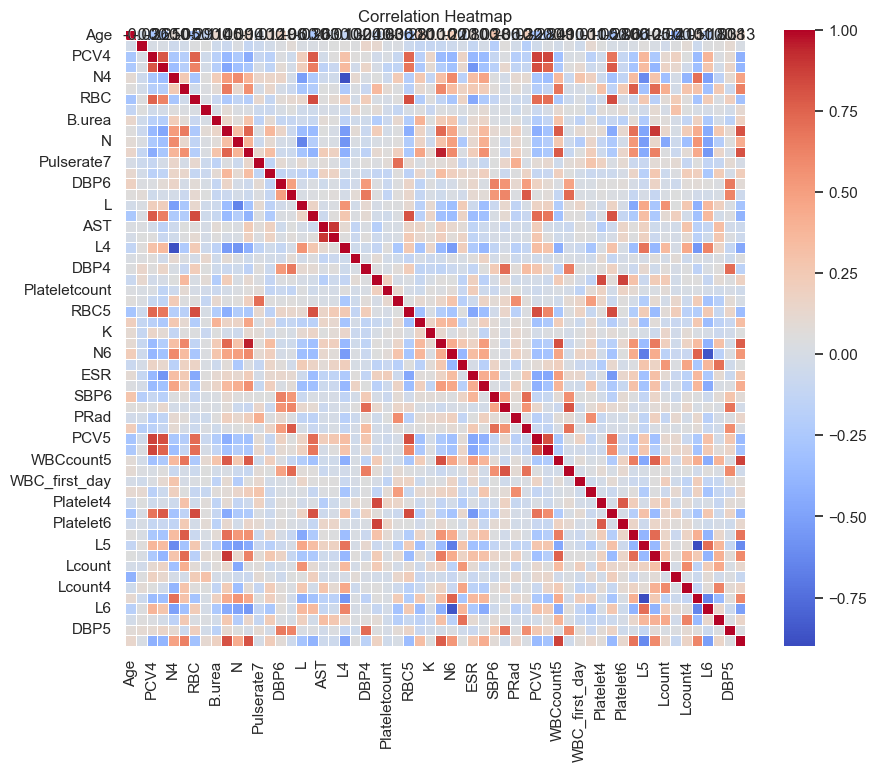

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[list(present_continuous_vars)].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
